# **1. Perkenalan Dataset**


---

### 1. Gambaran Umum Dataset

**California Housing** dataset diambil dari data sensus California pada tahun 1990. Dataset ini terdiri atas 20.640 sampel (observasi) dengan 8 fitur sebagai prediktor dan satu target. Berikut adalah detail fitur dan targetnya:

- **Features (fitur-fitur/variabel prediktor):**
  - **MedInc:** Pendapatan median per rumah tangga (dalam ribuan dolar).
  - **HouseAge:** Usia median rumah di blok rumah tersebut.
  - **AveRooms:** Rata-rata jumlah ruangan per rumah.
  - **AveBedrms:** Rata-rata jumlah kamar tidur per rumah.
  - **Population:** Jumlah penduduk di blok rumah.
  - **AveOccup:** Rata-rata jumlah penghuni per rumah.
  - **Latitude:** Garis lintang lokasi blok rumah.
  - **Longitude:** Garis bujur lokasi blok rumah.

- **Target:**
  - **MedHouseVal:** Nilai median rumah (dalam satuan \$100.000).

---

### 2. Cara Mengakses dan Memperkenalkan Dataset di scikit-learn

Karena dataset ini sudah ada di dalam scikit-learn, tidak perlu mengunduh file eksternal. Cukup gunakan fungsi `fetch_california_housing` yang menyediakan dataset dalam format yang mudah diolah.

---

### 3. Referensi Literatur atau Jurnal yang Relevan

**Harrison, D., & Rubinfeld, D. L. (1978). "Hedonic Housing Prices and the Demand for Clean Air." Journal of Environmental Economics and Management, 5(1), 81-102.**  
   - **Jurnal:** Journal of Big Data  
   - **Link:**   [Hedonic Housing Prices and the Demand for Clean Air (UMich Library)](https://hdl.handle.net/2027.42/22636

  Penelitian ini adalah salah satu studi yang menggunakan pendekatan model hedonic untuk mengaitkan karakteristik lingkungan dengan harga perumahan. Hasil karya ini menjadi landasan penting dalam mengaplikasikan analisis regresi pada data perumahan dan menginspirasi penggunaan Boston Housing Dataset dalam banyak studi selanjutnya.

---

# **2. Import Library**

In [1]:
# -------------------------------
# Import Library yang Diperlukan
# -------------------------------

# Untuk manipulasi data dan analisis
import pandas as pd    # Untuk pembuatan dan manipulasi DataFrame
import numpy as np     # Untuk operasi numerik dan array

# Untuk visualisasi data
import matplotlib.pyplot as plt   # Untuk pembuatan grafik dasar
import seaborn as sns               # Untuk visualisasi yang lebih interaktif dan estetis

# Setting style visualisasi dengan seaborn
sns.set(style="whitegrid")

# Jika digunakan dalam notebook Jupyter, aktifkan plotting inline
%matplotlib inline

# -------------------------------
# Import Fungsi Dataset dan Preprocessing dari scikit-learn
# -------------------------------

# Untuk memuat dataset California Housing yang sudah tersedia di scikit-learn
from sklearn.datasets import fetch_california_housing

# Untuk membagi dataset menjadi training dan testing set
from sklearn.model_selection import train_test_split

# Untuk melakukan scaling pada fitur numerik (standardisasi)
from sklearn.preprocessing import StandardScaler


# **3. Memuat Dataset**

In [2]:
# Setting style visualisasi agar grafik lebih menarik
sns.set(style="whitegrid")
%matplotlib inline

# Impor fungsi untuk mengambil dataset California Housing dari scikit-learn
from sklearn.datasets import fetch_california_housing

# --- Memuat Dataset California Housing ---
# fetch_california_housing dengan parameter as_frame=True akan mengembalikan output dalam bentuk DataFrame
california_data = fetch_california_housing(as_frame=True)

# Tampilkan deskripsi lengkap mengenai dataset
print("=== Deskripsi Dataset California Housing ===")
print(california_data.DESCR)

# Ekstrak DataFrame dari objek Bunch
df_california = california_data.frame

# --- Pemeriksaan Awal Dataset ---
# Tampilkan 5 baris pertama untuk verifikasi
print("\n=== 5 Baris Pertama Dataset ===")
print(df_california.head())

# Tampilkan informasi dasar dataset: jenis data, jumlah baris, dan kolom.
print("\n=== Informasi Dataset ===")
df_california.info()

# Tampilkan statistik deskriptif dataset
print("\n=== Statistik Deskriptif Dataset ===")
print(df_california.describe())

# Cek jumlah missing values di setiap kolom (seharusnya dataset ini tidak memiliki missing values)
print("\n=== Jumlah Missing Values Setiap Kolom ===")
print(df_california.isnull().sum())


=== Deskripsi Dataset California Housing ===
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived fr

---

**Insights:**

### 1. **Kelengkapan dan Struktur Data**

- **Jumlah Observasi dan Fitur:**  
  Dataset California Housing memiliki 20.640 entri dan 9 kolom (8 fitur prediktor dan 1 target). Semua kolom bertipe numerik (`float64`), yang memudahkan analisis numerik dan visualisasi.

- **Kelengkapan Data:**  
  Tidak ada nilai yang hilang (missing values) di seluruh kolom, yang menunjukkan data ini lengkap. Hal ini menguntungkan karena tidak perlu menerapkan teknik imputasi untuk mengisi missing values.

---

### 2. **Karakteristik Fitur-Fitur Utama**

- **Median Income (MedInc):**  
  - **Rata-rata:** Sekitar 3.87 (dalam ribuan dolar).  
  - **Sebaran:** Nilai minimum hanya 0.5 dan maksimum mencapai 15.00, dengan kuartil pertama (25%) sebesar 2.56, median (50%) 3.53, dan kuartil ketiga (75%) 4.74.  
  - **Insight:** Rentang yang cukup luas menunjukkan adanya variasi yang signifikan antar block group. Area dengan pendapatan tinggi (lebih mendekati 15 ribu dolar) bisa sangat memengaruhi hasil regresi.

- **House Age (HouseAge):**  
  - Rata-rata sekitar 28.64 tahun, dengan rentang dari 1 sampai 52 tahun.  
  - Insight: Properti di California tersebar dari yang sangat baru hingga yang berumur. Usia rumah dapat mencerminkan nilai bersejarah maupun potensi kebutuhan renovasi.

- **Average Rooms (AveRooms) dan Average Bedrooms (AveBedrms):**  
  - **AveRooms:** Rata-rata sekitar 5.43 dengan nilai maksimum yang sangat tinggi (sekitar 141.91).  
  - **AveBedrms:** Rata-rata sekitar 1.10 dengan nilai maksimum 34.07.  
  - **Insight:** Terlihat adanya outlier pada fitur _AveRooms_ (dan juga _AveBedrms_ meskipun tidak setinggi _AveRooms_). Beberapa block group mungkin memiliki rumah dengan jumlah ruangan yang luar biasa tinggi, ini bisa terjadi pada kompleks perumahan besar atau area dengan sedikit rumah tapi dengan akumulasi ruangan dari satu entitas.

- **Population dan Average Occupancy (AveOccup):**  
  - **Population:** Rata-rata sekitar 1.425 dengan standar deviasi yang besar (sekitar 1132), nilai maksimum mencapai 35.682, menunjukkan adanya blok dengan jumlah penduduk yang sangat tinggi.  
  - **AveOccup:** Rata-rata 3.07 dengan standar deviasi yang sangat tinggi (10.39), dan nilai maksimum mencapai 1243.33.  
  - **Insight:** Perbedaan yang ekstrem antara nilai tengah dan maksimum mengisyaratkan adanya outlier atau blok yang tidak representatif (misalnya, area dengan properti komersial atau kompleks khusus) yang perlu diperhatikan saat membangun model.

- **Latitude dan Longitude:**  
  - **Latitude:** Rata-rata sekitar 35.63 dengan rentang dari 32.54 hingga 41.95.  
  - **Longitude:** Rata-rata sekitar –119.57 dengan rentang dari –124.35 hingga –114.31.  
  - **Insight:** Nilai-nilai ini konsisten dengan letak geografis California. Fitur geografis ini juga dapat digunakan untuk menangkap perbedaan regional, misalnya, pengaruh lokasi terhadap nilai properti.

- **Median House Value (MedHouseVal) – Target:**
  - **Rata-rata:** Sekitar 2.07 (dalam satuan $100.000); dengan nilai minimum 0.15 dan maksimum tepat 5.00.  
  - **Insight:** Rata-rata dan distribusi target mengindikasikan bahwa nilai perumahan secara umum relatif rendah sampai menengah. Nilai maksimum yang tampaknya dikunci di angka 5.0 bisa menunjukkan adanya pembatasan dalam pelaporan data atau konsistensi batasan nilai di dataset.

---

### 3. **Insight Tambahan dari Statistika Deskriptif**

- **Distribusi dan Variabilitas:**  
  Setiap fitur menunjukkan tingkat variabilitas yang berbeda. Fitur-fitur seperti _Population_ dan _AveOccup_ memiliki standar deviasi yang sangat tinggi dibandingkan dengan nilai rata-ratanya, yang menunjukkan distribusi yang sangat skewed. Hal ini bisa memengaruhi model jika tidak ditangani (misalnya, dengan transformasi logaritmik atau penanganan outlier).

- **Outlier:**  
  Nilai maksimum pada beberapa fitur (_AveRooms_ dan _AveOccup_) jauh melampaui kuartil ketiga. Outlier ini dapat memberikan dampak besar terhadap nilai rata-rata dan pada akhirnya memengaruhi performa model regresi. Analisis lebih lanjut (misalnya dengan boxplot) dapat membantu menentukan apakah outlier tersebut harus diperlakukan atau dihapus.

- **Tidak Ada Missing Value:**  
  Karena semua kolom lengkap, langkah-langkah preprocessing akan lebih difokuskan pada penanganan outlier dan scaling daripada imputasi.

---

### 4. **Potensi Penggunaan Fitur**

- **Fitur Ekonomi dan Demografi:**  
  _MedInc_ (median income) kemungkinan besar menjadi indikator kuat dalam memprediksi _MedHouseVal_.  
- **Pengaruh Geografis:**  
  _Latitude_ dan _Longitude_ membuka kemungkinan untuk memasukkan informasi spasial dalam model, misalnya, dengan menggunakan teknik clustering atau memasukkan interaksi antara lokasi dan fitur lain.
- **Sifat Multivariat:**  
  Kombinasi antara _HouseAge_, _AveRooms_, dan _Population_ bisa memberikan gambaran bagaimana lingkungan fisik dan kepadatan penduduk saling mempengaruhi nilai rumah.

---

### Kesimpulan

Output EDA ini memberikan gambaran yang komprehensif mengenai karakteristik dataset California Housing. Data lengkap tanpa missing value memungkinkan proses modeling yang lebih baik. Namun, adanya outlier pada beberapa fitur dan variabilitas yang tinggi pada fitur demografis menunjukkan perlunya perhatian khusus, baik dalam hal transformasi data, scaling, maupun pemilihan fitur saat membangun model prediktif. Ini adalah dasar yang kokoh untuk langkah-langkah selanjutnya seperti preprocessing lebih mendalam dan modeling.

---

In [3]:
import os
import pandas as pd
from sklearn.datasets import fetch_california_housing

# 1. Membuat folder 'CaliforniaHousing_raw' jika belum ada
raw_folder = "CaliforniaHousing_raw"
if not os.path.exists(raw_folder):
    os.makedirs(raw_folder)
    print(f"Folder '{raw_folder}' telah dibuat.")

# 2. Memuat dataset California Housing dari scikit-learn
california_data = fetch_california_housing(as_frame=True)
df_raw = california_data.frame

# Opsional: Tampilkan deskripsi dataset agar kamu tahu data apa saja yang dimuat
print("Deskripsi Dataset California Housing:")
print(california_data.DESCR)

# 3. Menyimpan DataFrame ke CSV di folder 'CaliforniaHousing_raw'
csv_path = os.path.join(raw_folder, "CaliforniaHousing.csv")
df_raw.to_csv(csv_path, index=False)
print(f"Dataset telah disimpan ke: {csv_path}")


Folder 'CaliforniaHousing_raw' telah dibuat.
Deskripsi Dataset California Housing:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($

# **4. Exploratory Data Analysis (EDA)**

=== 5 Baris Pertama Dataset ===
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float6

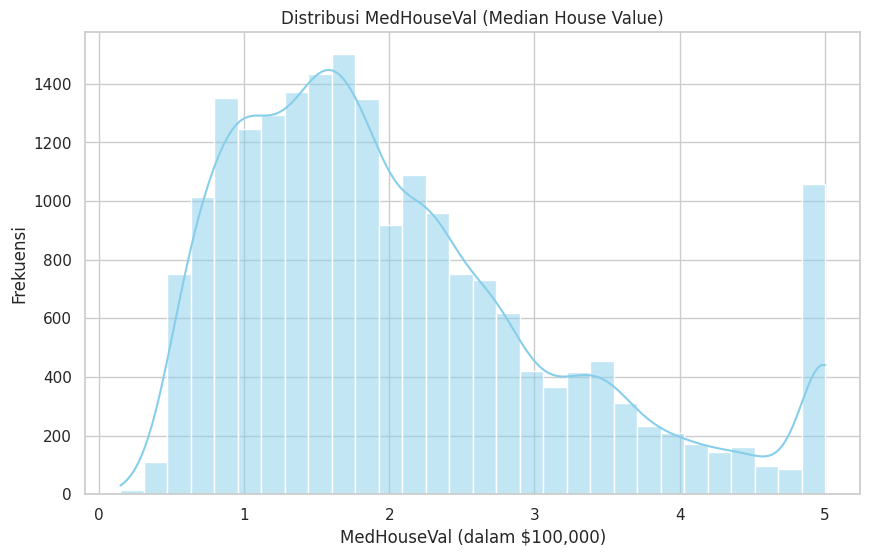

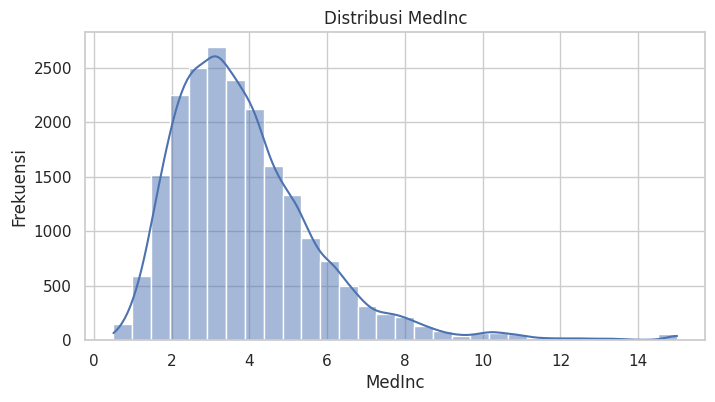

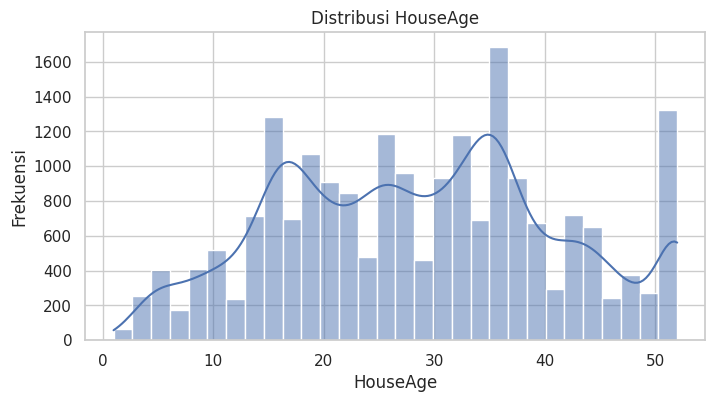

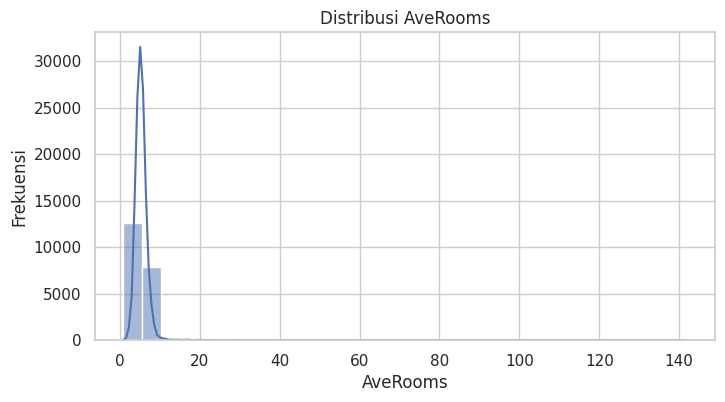

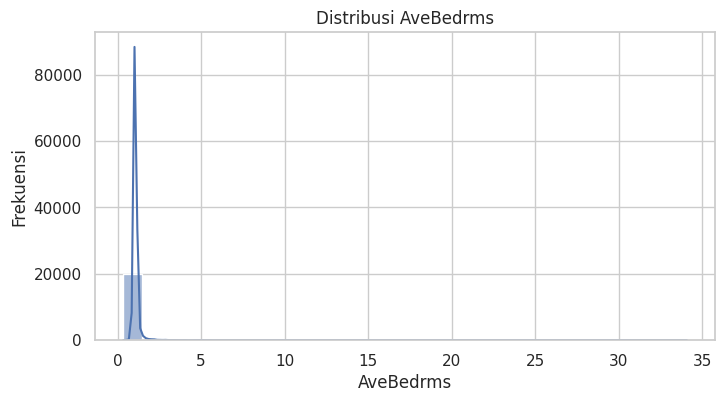

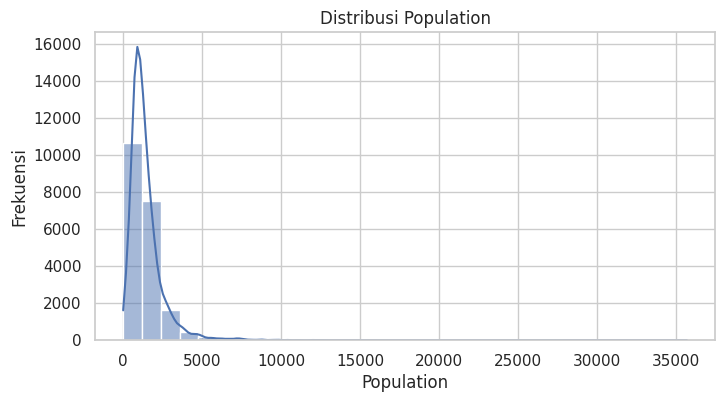

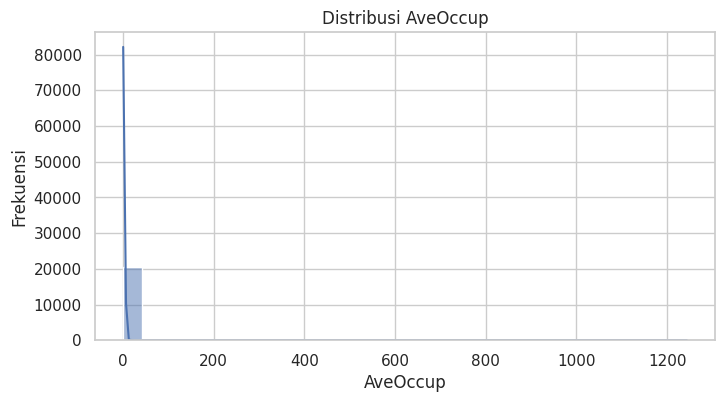

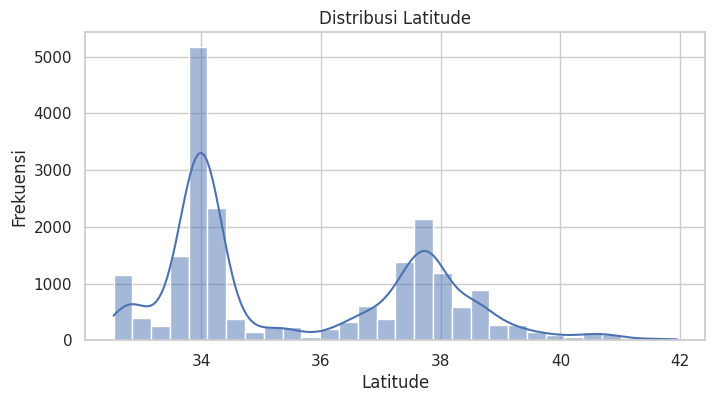

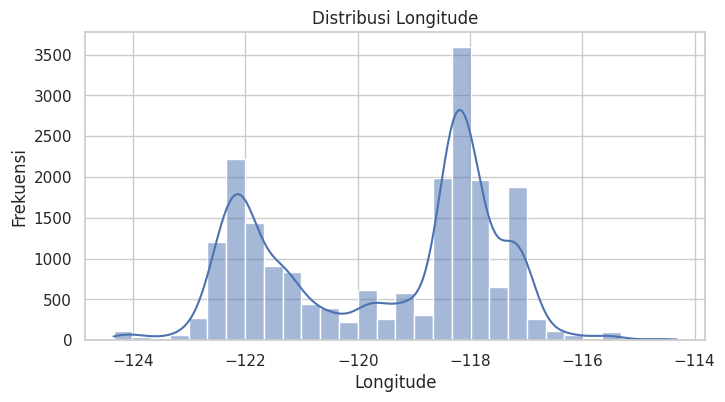

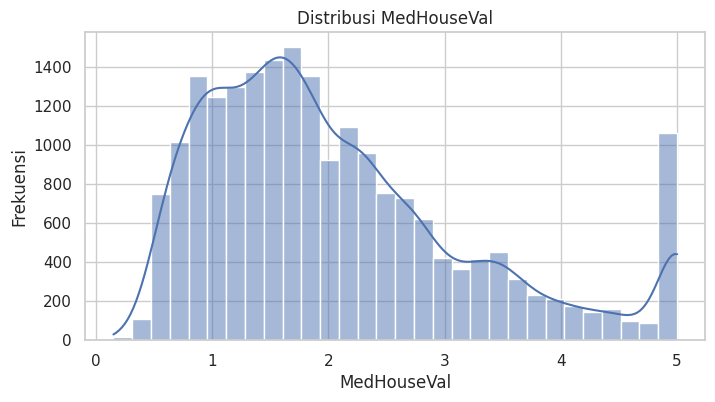

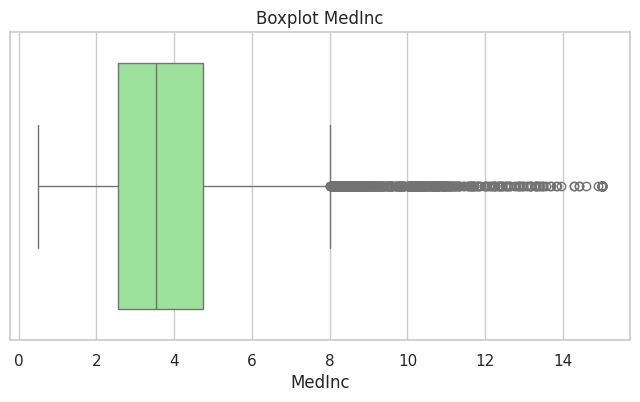

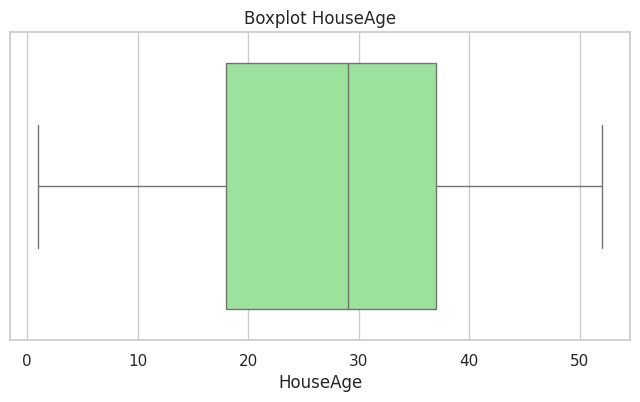

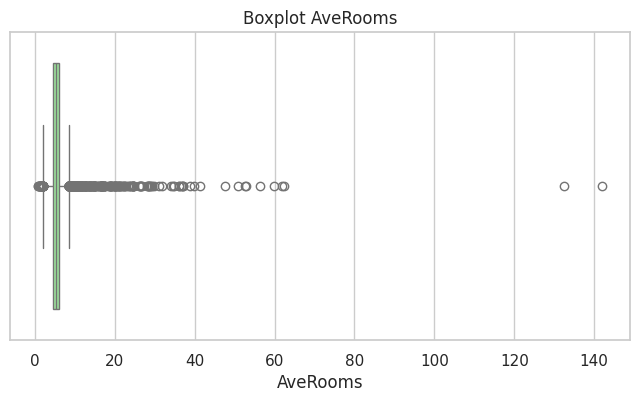

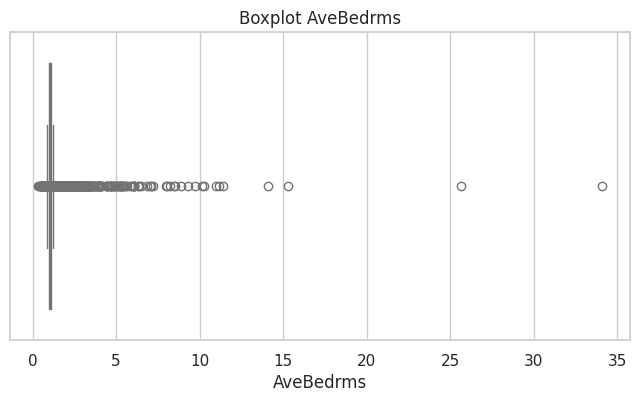

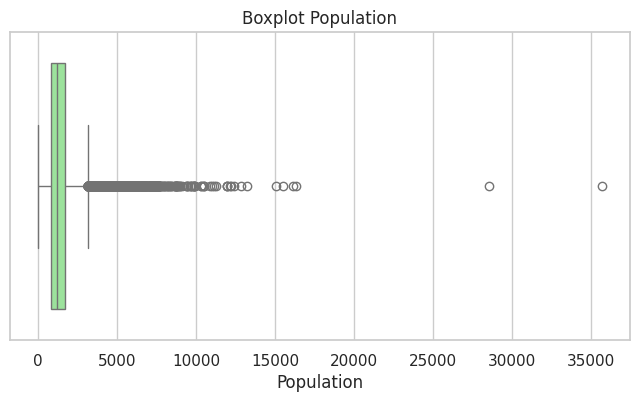

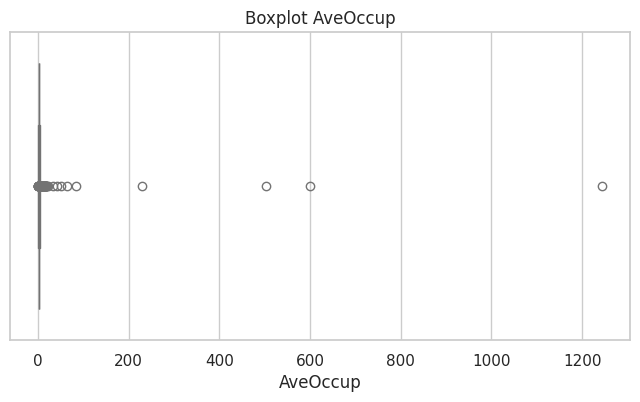

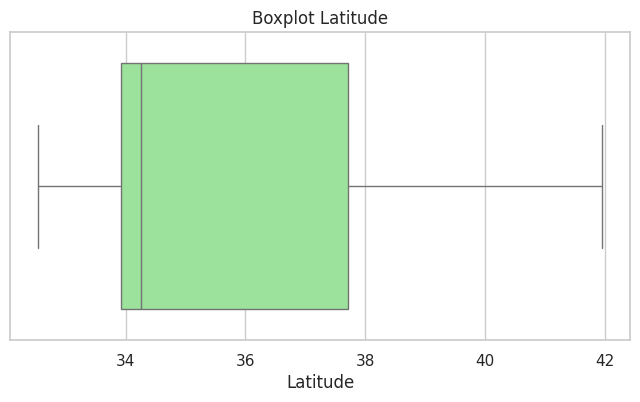

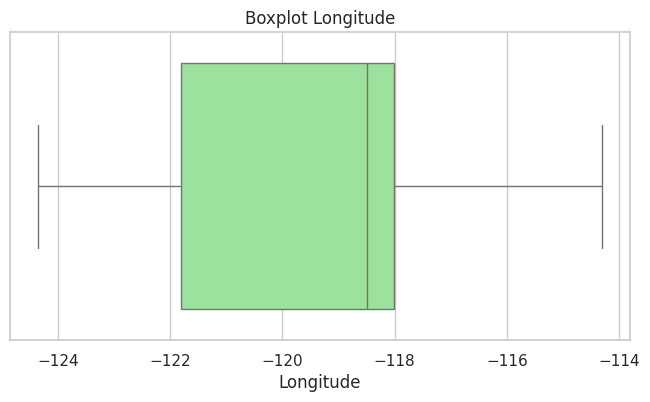

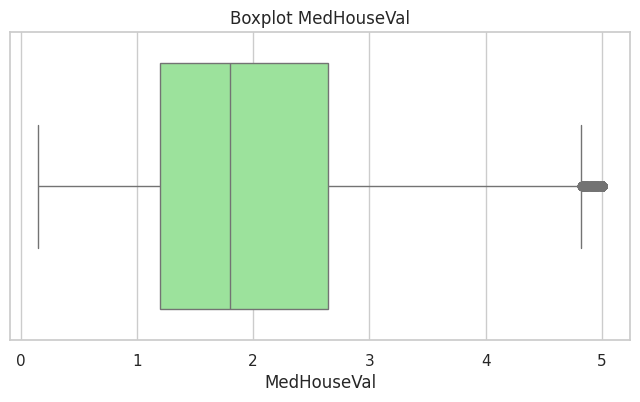

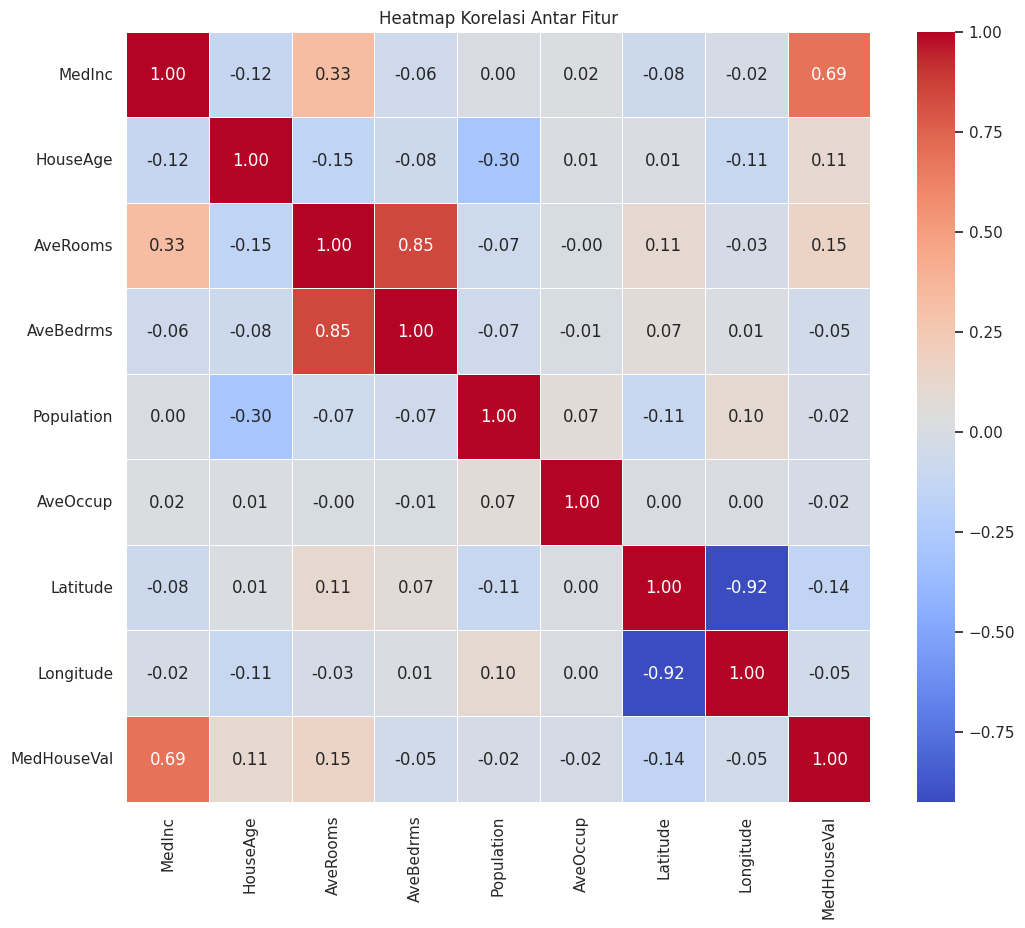

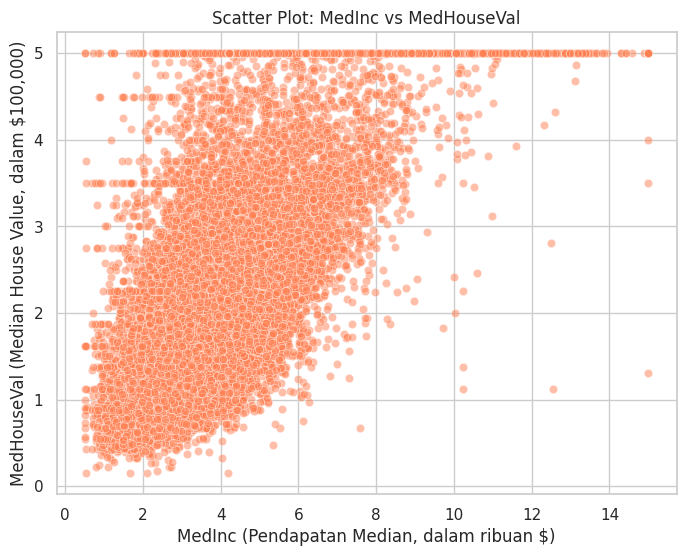

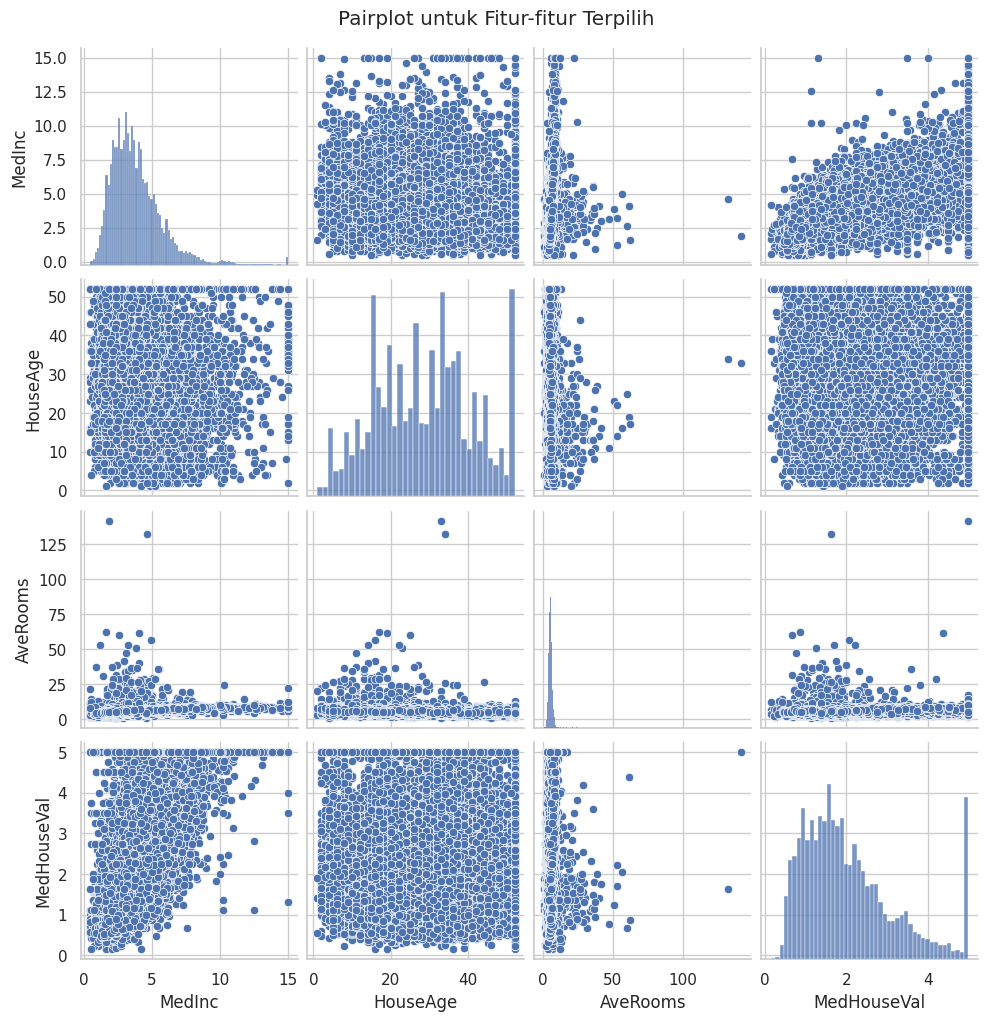

In [4]:
# --- Exploratory Data Analysis (EDA) untuk Dataset California Housing ---

# 1. Periksa 5 baris pertama untuk melihat gambaran awal data
print("=== 5 Baris Pertama Dataset ===")
print(df_california.head())

# 2. Informasi dasar dari dataset: tipe data, jumlah baris, dan kolom
print("\n=== Informasi Dataset ===")
df_california.info()

# 3. Statistik deskriptif untuk memberi gambaran tentang distribusi numerik data
print("\n=== Statistik Deskriptif Dataset ===")
print(df_california.describe())

# 4. Cek missing values di setiap kolom (seharusnya tidak ada missing values pada dataset ini)
print("\n=== Jumlah Missing Values Setiap Kolom ===")
print(df_california.isnull().sum())

# 5. Cek keberadaan baris duplikat dan hapus jika ditemukan
duplicate_count = df_california.duplicated().sum()
print(f"\n=== Jumlah Baris Duplikat: {duplicate_count} ===")
if duplicate_count > 0:
    df_california = df_california.drop_duplicates()
    print("Duplikasi telah dihapus.")
else:
    print("Tidak ada baris duplikat.")

# --- Visualisasi Data ---
# 6. Visualisasi Distribusi Target (MedHouseVal)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

plt.figure(figsize=(10, 6))
sns.histplot(df_california["MedHouseVal"], kde=True, bins=30, color="skyblue")
plt.title("Distribusi MedHouseVal (Median House Value)")
plt.xlabel("MedHouseVal (dalam $100,000)")
plt.ylabel("Frekuensi")
plt.show()

# 7. Visualisasi Distribusi Setiap Fitur Numerik
num_cols = df_california.select_dtypes(include="number").columns.tolist()
# Loop untuk memvisualisasikan semua kolom numerik
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_california[col], kde=True, bins=30)
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.show()

# 8. Analisis Outlier menggunakan Boxplot untuk setiap kolom numerik
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_california[col], color="lightgreen")
    plt.title(f"Boxplot {col}")
    plt.xlabel(col)
    plt.show()

# 9. Analisis Korelasi Antar Fitur
corr_matrix = df_california.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

# 10. Scatter Plot contoh: Hubungan antara MedInc (median income) dan MedHouseVal
plt.figure(figsize=(8, 6))
sns.scatterplot(x="MedInc", y="MedHouseVal", data=df_california, alpha=0.5, color="coral")
plt.title("Scatter Plot: MedInc vs MedHouseVal")
plt.xlabel("MedInc (Pendapatan Median, dalam ribuan $)")
plt.ylabel("MedHouseVal (Median House Value, dalam $100,000)")
plt.show()

# 11. Pairplot untuk melihat hubungan multivariat pada beberapa fitur penting
cols_to_plot = ["MedInc", "HouseAge", "AveRooms", "MedHouseVal"]
sns.pairplot(df_california[cols_to_plot])
plt.suptitle("Pairplot untuk Fitur-fitur Terpilih", y=1.02)
plt.show()


---
**Insights:**

### 1. **Kelengkapan dan Struktur Data**

- **Jumlah Observasi dan Fitur:**  
  Dataset memiliki 20.640 entri dan 9 kolom, yang terdiri atas 8 fitur prediktor dan 1 variabel target (*MedHouseVal*).  
- **Tipe Data:**  
  Semua kolom sudah berformat numerik (float64), sehingga tidak terdapat campuran tipe data yang dapat menghambat analisis numerik.
- **Kelengkapan Data:**  
  Tidak ada missing value di seluruh kolom. Hal ini menjadi keuntungan karena kita tidak perlu melakukan imputasi data, sehingga langkah cleaning bisa lebih difokuskan ke penanganan outlier atau transformasi.

---

### 2. **Statistik Deskriptif dan Distribusi Variabel**

- **MedInc (Median Income):**  
  - *Rata-rata:* Sekitar 3.87 (ribuan dolar)  
  - *Rentang:* Nilai minimum 0.50, kuartil 25% sekitar 2.56, median 3.53, dan kuartil 75% sekitar 4.74; maksimum mencapai 15.00.  
  **Insight:** Terdapat variasi yang signifikan dalam pendapatan antar block group, yang menandakan perbedaan ekonomi di wilayah California. Area dengan pendapatan lebih tinggi dapat berdampak positif terhadap nilai rumah.
  
- **HouseAge (Usia Rumah):**  
  - *Rata-rata:* Sekitar 28.64 tahun dengan rentang dari 1 sampai 52 tahun.  
  **Insight:** Usia rumah yang bervariasi menunjukkan bahwa terdapat properti baik yang masih relatif baru maupun yang sudah berumur, yang bisa mempengaruhi nilai properti karena faktor kondisi atau nilai historis.

- **AveRooms dan AveBedrms:**  
  - *AveRooms:* Rata-rata sekitar 5.43, tetapi terlihat nilai maksimum yang sangat tinggi (sekitar 141.91) dibandingkan dengan kuartil atasnya sekitar 6.05.  
  - *AveBedrms:* Rata-rata sekitar 1.10 dengan nilai maksimum sekitar 34.07.  
  **Insight:** Perbedaan yang mencolok menunjukkan adanya outlier, terutama pada *AveRooms*. Beberapa block group mungkin memiliki rumah dengan jumlah ruangan yang tidak umum, seperti properti komersial atau kawasan peristirahatan, sehingga perlu pertimbangan lebih lanjut saat modeling.

- **Population dan AveOccup:**  
  - *Population:* Rata-rata sekitar 1.425 dengan standar deviasi yang besar, menunjukkan bahwa di beberapa block group terdapat kepadatan penduduk yang sangat tinggi (nilai maksimum mencapai 35.682).  
  - *AveOccup:* Rata-rata sekitar 3.07, namun nilai maksimum mencapai 1243.33, mengisyaratkan adanya block group dengan karakteristik kepadatan yang ekstrem.  
  **Insight:** Variabilitas yang tinggi pada fitur-fitur ini mengindikasikan bahwa beberapa block group mungkin dipengaruhi oleh fenomena khusus, misalnya, area dengan pemukiman atau properti komersial yang sangat berbeda dibandingkan block group lain.

- **Latitude dan Longitude:**  
  - *Latitude:* Rata-rata sekitar 35.63 dengan rentang dari 32.54 hingga 41.95.  
  - *Longitude:* Rata-rata sekitar –119.57 dengan rentang dari –124.35 hingga –114.31.  
  **Insight:** Nilai geografis tersebut konsisten dengan letak wilayah California. Informasi ini dapat digunakan untuk analisis spasial atau pengelompokan daerah yang mempengaruhi nilai properti.

- **MedHouseVal (Median House Value) – Target:**  
  - *Rata-rata:* Sekitar 2.07 (yang berarti sekitar $207.000, karena target dinyatakan dalam satuan $100.000).  
  - *Distribusi:* Nilai minimum sekitar 0.15, dengan median 1.797 dan nilai maksimum tepat 5.00.  
  **Insight:** Distribusi target menunjukkan bahwa mayoritas nilai rumah berada pada kisaran rendah hingga menengah. Batas atas yang tampaknya terkunci di angka 5.00 mungkin menunjukkan adanya pembatasan dalam pelaporan data.

---

### 3. **Analisis Outlier dan Variabilitas**

- **Deteksi Outlier dengan Boxplot:**  
  Boxplot untuk setiap fitur menunjukkan bahwa fitur seperti *AveRooms* dan *AveOccup* memiliki nilai outlier yang sangat tinggi dibandingkan dengan kuartil atas. Ini menandakan bahwa sejumlah kecil block group memiliki nilai ekstrem, yang bisa memengaruhi perhitungan rata-rata dan modeling.
  
- **Distribusi Skewed:**  
  Standar deviasi yang tinggi untuk fitur *Population* dan *AveOccup* mengindikasikan sebaran nilai yang sangat skewed. Transformasi logaritmik atau teknik normalisasi lain mungkin diperlukan untuk menangani skewness ini dalam tahap pemodelan.

---

### 4. **Potensi Penggunaan Fitur dan Hubungan Antar Variabel**

- **Prediktor Ekonomi dan Demografi:**  
  Fitur seperti *MedInc* (median income) kemungkinan akan berpengaruh besar dalam memprediksi *MedHouseVal*, karena pendapatan seringkali berkorelasi positif dengan nilai properti.
  
- **Pengaruh Geografis:**  
  Latitude dan Longitude dapat memberikan insight tambahan terkait perbedaan regional. Menggunakan informasi spasial bisa membantu mengidentifikasi klaster dengan nilai properti tinggi atau rendah.
  
- **Interaksi Fitur:**  
  Kombinasi antara usia rumah (*HouseAge*), jumlah ruangan (*AveRooms*), dan kepadatan penduduk (*Population*) dapat memberikan gambaran menyeluruh mengenai lingkungan fisik dan demografis yang mempengaruhi nilai properti.

- **Hubungan Multivariat:**  
  Pairplot menunjukkan bagaimana fitur-fitur seperti *MedInc*, *HouseAge*, dan *AveRooms* saling berinteraksi dengan target *MedHouseVal*. Visualisasi ini membantu mengidentifikasi pola-pola potensial yang dapat dieksploitasi dalam model prediksi.

---

### 5. **Kesimpulan**

Output EDA memberikan gambaran menyeluruh bahwa:

- **Data lengkap dan bersih:** Tidak ada missing values maupun duplikasi, membuat dataset siap untuk tahap preprocessing dan modeling.
- **Variasi yang Signifikan:** Terdapat rentang nilai yang luas terutama pada fitur ekonomi dan demografi, serta nilai outlier pada beberapa fitur seperti *AveRooms* dan *AveOccup*, yang perlu diatasi selama tahap transformasi data.
- **Kesesuaian Geografis:** Informasi latitude dan longitude konsisten dengan lokasi California, yang membuka peluang untuk analisis spasial.
- **Potensi Fitur yang Kuat:** Fitur seperti *MedInc* dan *Population* tampak sangat berpengaruh terhadap nilai rumah, sehingga perlu diperhatikan dalam pembuatan model regresi.

---

# **5. Data Preprocessing**

In [5]:
# ===============================
# Data Preprocessing untuk Dataset California Housing
# ===============================

# Asumsikan bahwa DataFrame 'df_california' sudah dihasilkan dari tahap memuat dataset.
# (Misalnya: df_california = fetch_california_housing(as_frame=True).frame)

# 1. Menangani Missing Values
# Meskipun dataset California Housing tidak memiliki missing values,
# langkah ini tetap dilakukan sebagai langkah standar.
df_california.fillna(df_california.median(), inplace=True)
print("=== Jumlah Missing Values Setelah Imputasi ===")
print(df_california.isnull().sum())

# 2. Menghapus Baris Duplikat (jika ada)
duplicate_count = df_california.duplicated().sum()
print("\n=== Jumlah Baris Duplikat ===")
print(duplicate_count)
if duplicate_count > 0:
    df_california.drop_duplicates(inplace=True)
    print("Duplikasi telah dihapus. Ukuran dataset baru:", df_california.shape)
else:
    print("Tidak ada baris duplikat yang ditemukan.")

# 3. Handling Data Kategori
# Untuk California Housing, seluruh kolom merupakan fitur numerik.
# Sehingga, tidak ada yang perlu di-encoding (misal, one-hot) untuk kategori.
print("\n=== Tidak Ada Kolom Kategori yang Perlu Diproses ===")

# 4. Memisahkan Fitur (X) dan Target (y)
# Target: 'MedHouseVal'; Fitur: kolom lainnya
X = df_california.drop("MedHouseVal", axis=1)
y = df_california["MedHouseVal"]

print("\nDimensi Fitur (X):", X.shape)
print("Dimensi Target (y):", y.shape)

# 5. Membagi Dataset ke Training dan Testing Set
from sklearn.model_selection import train_test_split

# Menggunakan 20% data untuk testing dengan random_state agar hasil reproduktif
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("\nDimensi Training Set:", X_train.shape)
print("Dimensi Testing Set:", X_test.shape)

# 6. Feature Scaling untuk Fitur Numerik
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Lakukan fitting pada data training agar memperoleh parameter scaling (mean dan std)
X_train_scaled = scaler.fit_transform(X_train)
# Terapkan transformasi yang sama ke data testing
X_test_scaled = scaler.transform(X_test)

# Konversi hasil scaling kembali ke DataFrame untuk memudahkan inspeksi
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df  = pd.DataFrame(X_test_scaled,  columns=X_test.columns, index=X_test.index)

print("\n=== Contoh Data Training yang Sudah di-Scale ===")
print(X_train_scaled_df.head())


=== Jumlah Missing Values Setelah Imputasi ===
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

=== Jumlah Baris Duplikat ===
0
Tidak ada baris duplikat yang ditemukan.

=== Tidak Ada Kolom Kategori yang Perlu Diproses ===

Dimensi Fitur (X): (20640, 8)
Dimensi Target (y): (20640,)

Dimensi Training Set: (16512, 8)
Dimensi Testing Set: (4128, 8)

=== Contoh Data Training yang Sudah di-Scale ===
         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
14196 -0.326196  0.348490 -0.174916  -0.208365    0.768276  0.051376   
8267  -0.035843  1.618118 -0.402835  -0.128530   -0.098901 -0.117362   
17445  0.144701 -1.952710  0.088216  -0.257538   -0.449818 -0.032280   
14265 -1.017864  0.586545 -0.600015  -0.145156   -0.007434  0.077507   
2271  -0.171488  1.142008  0.349007   0.086624   -0.485877 -0.068832   

       Latitude  Longitude  
14196 -1.372811   1.27

---
**Insights:**

### 1. **Kelengkapan dan Kebersihan Data**

- **Missing Values:**  
  Semua kolom dalam dataset tidak memiliki nilai yang hilang (0 missing value pada setiap kolom).  
  **Insight:** Data sudah lengkap, sehingga tidak diperlukan imputasi nilai. Hal ini mengurangi risiko bias pada model yang mungkin muncul karena imputasi data.

- **Duplikasi Data:**  
  Tidak ada baris duplikat dalam dataset (duplicate count = 0).  
  **Insight:** Data yang bersih dari duplikasi memastikan bahwa setiap observasi adalah unik dan tidak terjadi pengulangan yang dapat merusak estimasi model.

- **Penanganan Kategori:**  
  Karena semua fitur berupa nilai numerik, tidak diperlukan pengkodean (one-hot encoding atau sejenisnya).  
  **Insight:** Proses ini memastikan bahwa kita dapat langsung menggunakan fitur-fitur tersebut untuk analisis numerik ataupun modeling tanpa transformasi tambahan.

---

### 2. **Struktur Dataset dan Pemisahan Variabel**

- **Dimensi Fitur dan Target:**  
  - Fitur (X) terdiri atas 8 kolom dengan total 20.640 entri.
  - Target (y) memiliki 20.640 entri.  
  **Insight:** Dengan jumlah observasi dan variabel yang konsisten, dataset siap untuk analisis lebih lanjut, karena pemisahan fitur dan target sudah dilakukan dengan tepat.

- **Pembagian Data:**  
  - Training set: 16.512 observasi (80% dari total).
  - Testing set: 4.128 observasi (20% dari total).  
  **Insight:** Pembagian 80:20 merupakan praktek umum yang baik untuk memastikan model dapat dilatih pada sebagian data dan diuji pada data yang tidak digunakan saat pelatihan untuk evaluasi performa.

---

### 3. **Feature Scaling**

- **Standardisasi Fitur:**  
  - Menggunakan `StandardScaler`, data training telah dinormalisasi sehingga setiap fitur memiliki distribusi dengan mean mendekati 0 dan standar deviasi 1.  
  - Hasil scaling terlihat jelas dengan contoh data training yang telah di-scale, di mana nilai fitur berubah sehingga perbedaan skala antar fitur tidak mempengaruhi modeling.
  
  **Insight:**
  
  - **Konsistensi Skala:** Penyesuaian skala memastikan bahwa fitur dengan nilai besar (misalnya Population) tidak mendominasi fitur dengan range yang lebih kecil. Hal ini penting untuk algoritma yang sensitif terhadap skala seperti regresi linier.
  
  - **Peningkatan Kinerja Model:** Data yang sudah di-scale biasanya menghasilkan konvergensi yang lebih baik dan kestabilan pada proses training model.

---

### 4. **Kesimpulan Umum Preprocessing**

- **Data Input Siap untuk Modeling:**  
  Proses preprocessing telah memastikan bahwa dataset:
  - Lengkap dari missing values,
  - Bebas dari duplikasi, dan
  - Telah diproses dengan scaling yang sesuai.
  
- **Implementasi Standar:**  
  Langkah-langkah standar (handling missing values, checking duplikasi, pemisahan fitur dan target, pembagian data, dan standardisasi) telah dilakukan dengan seksama dan teliti, memberikan fondasi data yang bersih serta scale yang konsisten untuk tahap modeling lebih lanjut.

---